In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [62]:
df = pd.read_csv('marketing_campaign.csv',sep='\t')
pd.set_option('display.max_columns',None)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [63]:
df.shape

(2240, 29)

In [64]:
df.describe().round(2)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00,2240.00,2216.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.0,2240.0,2240.00
mean,5592.16,1968.81,52247.25,0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.0,11.0,0.15
std,3246.66,11.98,25173.08,0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.0,0.0,0.36
min,0.00,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
25%,2828.25,1959.00,35303.00,0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
50%,5458.50,1970.00,51381.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
75%,8427.75,1977.00,68522.00,1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
max,11191.00,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.0,11.0,1.00


In [65]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [66]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## Cleaning data

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [69]:
df['Income'].mean().round(2)

52247.25

In [70]:
df['Income'].fillna(df['Income'].mean().round(2),inplace = True)

In [71]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [72]:
# Changing data type from object to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [73]:
column_mapping = {
    'MntWines': 'Wines',
    'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat Products',
    'MntFishProducts': 'Fish Products',
    'MntSweetProducts': 'Sweet Products',
    'MntGoldProds': 'Gold Products'
}

rename_columns = df.rename(columns=column_mapping,inplace = True)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat Products,Fish Products,Sweet Products,Gold Products,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [74]:
df['Children'] = df['Kidhome'] + df['Teenhome']
df.drop(['Kidhome','Teenhome'],axis= 1,inplace = True)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Wines,Fruits,Meat Products,Fish Products,Sweet Products,Gold Products,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children
0,5524,1957,Graduation,Single,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Together,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1
4,5324,1981,PhD,Married,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1


In [75]:
df['MntTotal'] = df['Wines'] + df['Fruits'] + df['Meat Products'] + \
                 df['Fish Products'] + df['Sweet Products'] + df['Gold Products']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Wines,Fruits,Meat Products,Fish Products,Sweet Products,Gold Products,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,MntTotal
0,5524,1957,Graduation,Single,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,1617
1,2174,1954,Graduation,Single,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,27
2,4141,1965,Graduation,Together,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,776
3,6182,1984,Graduation,Together,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,53
4,5324,1981,PhD,Married,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,422


In [76]:
df['Marital_Status'].replace(['Alone'],'Single',inplace = True)
df['Marital_Status'].replace(['Absurd','YOLO'],'Others',inplace = True)

In [77]:
#Anova Test
basic = df[df['Education'] == 'Basic']['MntTotal']
phd = df[df['Education'] == 'PhD']['MntTotal']
master = df[df['Education'] == 'Master']['MntTotal']

f_stat, p_value = stats.f_oneway(basic, phd, master)
print(f'F-statistic: {f_stat}')
print(f'p-value: {p_value}')

#Tukey Test

tukey= pairwise_tukeyhsd(endog = df['MntTotal'],groups = df['Education'],alpha = 0.05)

print("\nTukey's test results:")
print(tukey)

F-statistic: 23.41780091806367
p-value: 1.2124380276631875e-10

Tukey's test results:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1     group2    meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------
  2n Cycle      Basic -414.7308 0.0001 -663.6349 -165.8267   True
  2n Cycle Graduation  123.3718 0.0518   -0.5725   247.316  False
  2n Cycle     Master   115.254  0.174  -26.7298  257.2378  False
  2n Cycle        PhD  175.8824 0.0038   40.0342  311.7306   True
     Basic Graduation  538.1026    0.0  311.6504  764.5547   True
     Basic     Master  529.9848    0.0  293.1772  766.7924   True
     Basic        PhD  590.6132    0.0  357.4326  823.7937   True
Graduation     Master   -8.1178 0.9994 -105.5177   89.2821  False
Graduation        PhD   52.5106 0.4814  -35.7054  140.7266  False
    Master        PhD   60.6284 0.5784  -51.5291  172.7859  False
--------------------------------------------------------

Text(0.5, 1.0, 'Density of Spending by Education Level')

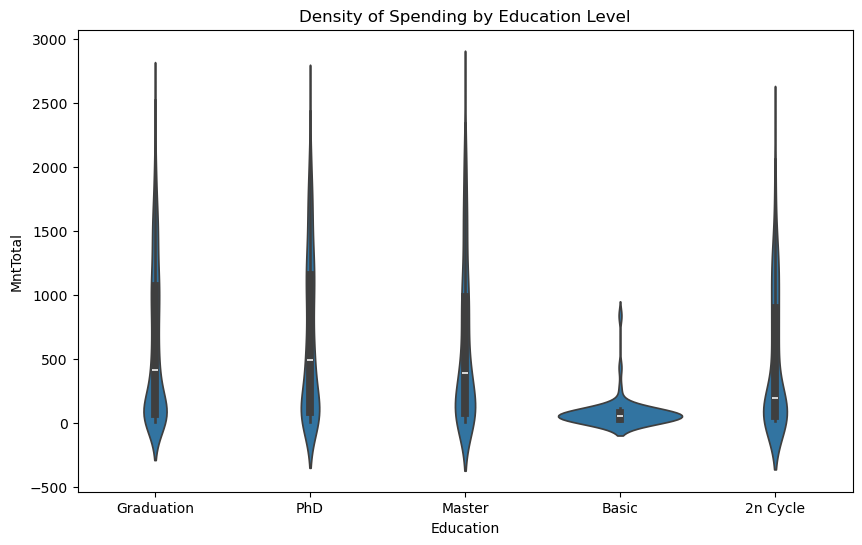

In [78]:
plt.figure(figsize=(10,6))
sns.violinplot(x= 'Education',y='MntTotal',data=df)
plt.title("Density of Spending by Education Level")

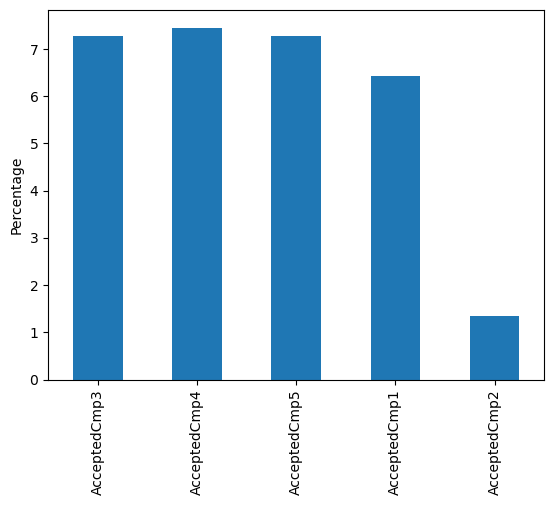

In [155]:
camp = ['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2']

success_camp = (df[camp].sum()/df.shape[0])*100
success_camp.plot( kind='bar')
plt.ylabel('Percentage')

plt.show()

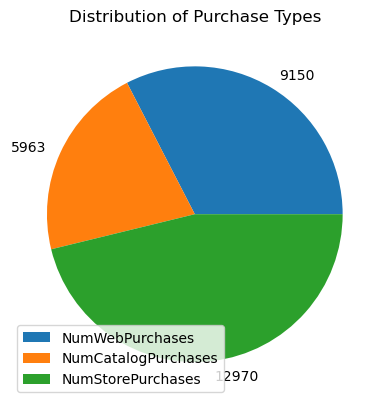

In [185]:
num_purchases = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
values =  [df[col].sum() for col in num_purchases]

plt.pie(values,labels = values)
plt.title('Distribution of Purchase Types')
plt.legend(num_purchases)
plt.show()

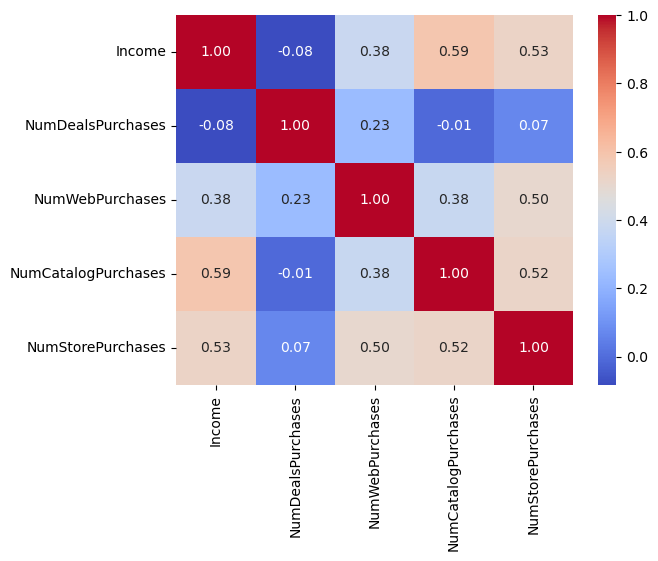

In [187]:
corr= df[['Income','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].corr()
sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()


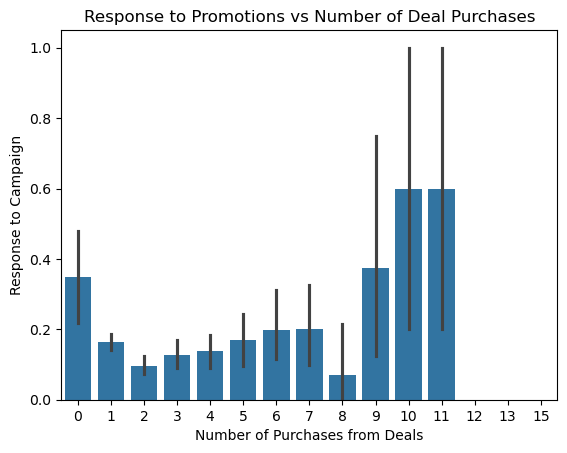

In [135]:
sns.barplot(x='NumDealsPurchases', y='Response', data=df)
plt.title('Response to Promotions vs Number of Deal Purchases')
plt.xlabel('Number of Purchases from Deals')
plt.ylabel('Response to Campaign')
plt.show()


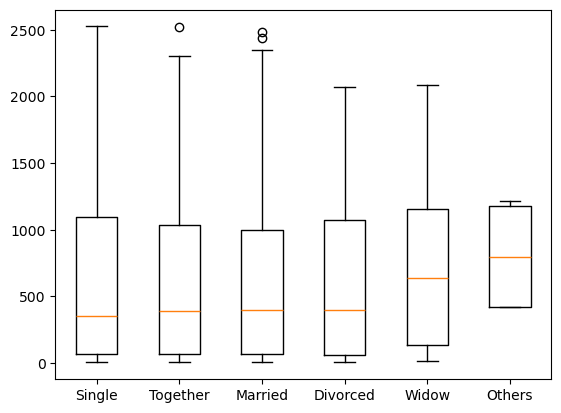

In [80]:
plt.boxplot([df[df['Marital_Status']==status]['MntTotal'] 
           for status in df['Marital_Status'].unique()],
           labels=df['Marital_Status'].unique())
plt.show()